# **1. Análisis Exploratorio - Descriptivo**





In [ ]:
# R
%load_ext rpy2.ipython

In [1]:
import pandas as pd 
import numpy as np
from scipy.stats import trim_mean
from numpy import mean, absolute
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
from sklearn import *

In [ ]:
class bcolors:
    OK = '\033[92m' #GREEN
    WARNING = '\033[93m' #YELLOW
    FAIL = '\033[91m' #RED
    RESET = '\033[0m' #RESET COLOR

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/UseLand_Total.csv' , sep = ";")
data.head()

,CountryorArea,Element,Year,Unit,Value,ValueFootnotes,UseLand,Continent
0,Afghanistan,Area,2018,1000 ha,3791900,Q,Agricultural Land,Asia
1,Afghanistan,Area,2017,1000 ha,3791000,Q,Agricultural Land,Asia
2,Afghanistan,Area,2016,1000 ha,3791000,Q,Agricultural Land,Asia
3,Afghanistan,Area,2015,1000 ha,3791000,Q,Agricultural Land,Asia
4,Afghanistan,Area,2014,1000 ha,3791000,Q,Agricultural Land,Asia


In [ ]:
import pandas as pd
data1 = pd.read_csv('/content/drive/MyDrive/UseLandPivot.csv' , sep = ";")
data1.head()

,Country,Year,Continent,CountryArea,LandArea,CoastalWaters,InlandWaters,PrimaryForest,PlantedForest,NaturallyRegeneratingForest,AgricultureAreaCertifiedOrganic,AgricultureAreaActuallyIrrigated,CroplandAreaCertifiedOrganic,CroplandAreaActuallyIrrigated,Cropland,Forestland,LandAreaEquippedIrrigation,LandUnderPermanentCrops,LandUnderTemporaryCrops,PermMeadowsPasturesNatGrowing,PermMeadowsPasturesCultivated
0,Afghanistan,1963,Asia,6528600,6528600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,781000.0,NaN,238000.0,6000.0,NaN,NaN,NaN
1,Afghanistan,1964,Asia,6528600,6528600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,787300.0,NaN,238000.0,7300.0,NaN,NaN,NaN
2,Afghanistan,1965,Asia,6528600,6528600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,787500.0,NaN,238000.0,7500.0,NaN,NaN,NaN
3,Afghanistan,1966,Asia,6528600,6528600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,791300.0,NaN,238000.0,7800.0,NaN,NaN,NaN
4,Afghanistan,1971,Asia,6528600,6528600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,803600.0,NaN,238600.0,13600.0,NaN,NaN,NaN


## **1.1. Medidas de centralidad**

In [ ]:
data.Value[(data.CountryorArea == "Colombia") & (data.UseLand == "Agriculture area actually irrigated")].describe(include='all')

count        2.000000
mean     52230.000000
std      18144.360005
min      39400.000000
25%      45815.000000
50%      52230.000000
75%      58645.000000
max      65060.000000
Name: Value, dtype: float64

### **1.1.1. Media**

In [ ]:
for i in data.CountryorArea.unique():
  for j in data.UseLand.unique():
    mean_ = data.Value[(data.CountryorArea == i) & (data.UseLand == j)].mean()
    print(f'La media para {i} en {j} es de {mean_}')

Se han truncado las últimas 5000 líneas del flujo de salida.
La media para Ecuador en Land under protective cover es de nan
La media para Ecuador en Land under temporary crops es de 98224.70588235294
La media para Ecuador en Naturally regenerating forest es de 1343788.5172413792
La media para Ecuador en Perm. meadows and pastures - Cultivated es de 316845.5882352941
La media para Ecuador en Perm. meadows and pastures - Nat. Growing es de 123014.70588235294
La media para Ecuador en Perm. meadows and pastures area actually irrig. es de nan
La media para Ecuador en Planted Forest es de 8014.862068965517
La media para Ecuador en Primary Forest es de 1339888.1785714286
La media para Egypt en Agricultural Land es de 302677.775862069
La media para Egypt en Agriculture area actually irrigated es de nan
La media para Egypt en Agriculture area certified organic es de nan
La media para Egypt en Coastal waters es de nan
La media para Egypt en Country area es de 10014500.0
La media para Egypt en Cr

In [ ]:
for country in data.CountryorArea.unique(): #La variable doomie puede llamarse de cualquier manera(e.g. 'i' o 'country')
  for use in data.UseLand.unique():
    mean_ = data.Value[(data.CountryorArea == country) & (data.UseLand == use)].mean()
    print(f'La media para {country} en {use} es de {mean_}')

### **1.1.2. Mediana**

In [ ]:
for i in data.CountryorArea.unique():
  for j in data.UseLand.unique():
    median_ = data.Value[(data.CountryorArea == i) & (data.UseLand == j)].median()
    print(f'La mediana para {i} en {j} es de {median_}')

Se han truncado las últimas 5000 líneas del flujo de salida.
La mediana para Ecuador en Land under protective cover es de nan
La mediana para Ecuador en Land under temporary crops es de 100100.0
La mediana para Ecuador en Naturally regenerating forest es de 1337356.0
La mediana para Ecuador en Perm. meadows and pastures - Cultivated es de 340990.0
La mediana para Ecuador en Perm. meadows and pastures - Nat. Growing es de 140100.0
La mediana para Ecuador en Perm. meadows and pastures area actually irrig. es de nan
La mediana para Ecuador en Planted Forest es de 7602.0
La mediana para Ecuador en Primary Forest es de 1335229.0
La mediana para Egypt en Agricultural Land es de 285350.0
La mediana para Egypt en Agriculture area actually irrigated es de nan
La mediana para Egypt en Agriculture area certified organic es de nan
La mediana para Egypt en Coastal waters es de nan
La mediana para Egypt en Country area es de 10014500.0
La mediana para Egypt en Cropland area actually irrigated es de 

### **1.1.3. Percentiles**

In [ ]:
for i in np.arange(0, 1.01, 0.01):
    print(i,"%:",data.Value[(data.CountryorArea == "Colombia") & (data.UseLand == "Agriculture area actually irrigated")].quantile(i))

0.0 %: 39400.0
0.01 %: 39656.6
0.02 %: 39913.2
0.03 %: 40169.8
0.04 %: 40426.4
0.05 %: 40683.0
0.06 %: 40939.6
0.07 %: 41196.2
0.08 %: 41452.8
0.09 %: 41709.4
0.1 %: 41966.0
0.11 %: 42222.6
0.12 %: 42479.2
0.13 %: 42735.8
0.14 %: 42992.4
0.15 %: 43249.0
0.16 %: 43505.6
0.17 %: 43762.2
0.18 %: 44018.8
0.19 %: 44275.4
0.2 %: 44532.0
0.21 %: 44788.6
0.22 %: 45045.2
0.23 %: 45301.8
0.24 %: 45558.4
0.25 %: 45815.0
0.26 %: 46071.600000000006
0.27 %: 46328.2
0.28 %: 46584.8
0.29 %: 46841.399999999994
0.3 %: 47098.0
0.31 %: 47354.59999999999
0.32 %: 47611.2
0.33 %: 47867.799999999996
0.34 %: 48124.399999999994
0.35000000000000003 %: 48381.0
0.36 %: 48637.6
0.37 %: 48894.2
0.38 %: 49150.8
0.39 %: 49407.4
0.4 %: 49664.0
0.41000000000000003 %: 49920.600000000006
0.42 %: 50177.200000000004
0.43 %: 50433.8
0.44 %: 50690.40000000001
0.45 %: 50947.0
0.46 %: 51203.600000000006
0.47000000000000003 %: 51460.2
0.48 %: 51716.8
0.49 %: 51973.399999999994
0.5 %: 52230.0
0.51 %: 52486.6
0.52 %: 52743.2000000

In [ ]:
for i in np.arange(0, 1.25, 0.25):
    print(i,"%:",data.Value[(data.CountryorArea == "Colombia") & (data.UseLand == "Naturally regenerating forest")].quantile(i))

0.0 %: 5911308.0
0.25 %: 6028332.0
0.5 %: 6171248.0
0.75 %: 6325720.0
1.0 %: 6486114.0


In [ ]:
#Cuenta de objetos por cada variable del dataset
data.count(axis=0 , numeric_only=False)

CountryorArea     136502
Element           136502
Year              136502
Unit              136502
Value             136502
ValueFootnotes    136502
UseLand           136502
Continent         136502
dtype: int64

### **1.1.4. Frecuencia y Frecuencia porcentual o relativa**

In [ ]:
fr_abs = data.groupby(data.UseLand).size().nlargest(len(data.Continent))
fr_abs

UseLand
Land area                                          14738
Country area                                       14738
Forest land                                        14530
Agricultural Land                                  14369
Cropland                                           14187
Land under permanent crops                         13171
Land area equipped for irrigation                  11568
Inland waters                                      10755
Primary Forest                                      7298
Naturally regenerating forest                       7277
Planted Forest                                      7277
Agriculture area certified organic                  1667
Land under temporary crops                          1325
Agriculture area actually irrigated                  903
Perm. meadows and pastures - Nat. Growing            721
Perm. meadows and pastures - Cultivated              632
Cropland area actually irrigated                     437
Cropland area certified

In [ ]:
fr_rel = pd.DataFrame(data.groupby(data.UseLand).size().nlargest(len(data.Continent)) / data.shape[0],
                      columns=['Rrecuencia_Relativa'])

acum = []
val_acum = 0
for i in fr_rel.values:
  val_acum = val_acum + i
  acum.append(val_acum)
  pd.DataFrame(acum)
fr_rel['Frecuencia relativa acumulada'] = acum
fr_rel

,Rrecuencia_Relativa,Frecuencia relativa acumulada
UseLand,,
Land area,0.107969,[0.10796911400565559]
Country area,0.107969,[0.21593822801131118]
Forest land,0.106445,[0.3223835548197096]
Agricultural Land,0.105266,[0.4276494117302311]
Cropland,0.103933,[0.5315819548431525]
Land under permanent crops,0.096489,[0.6280713835694716]
Land area equipped for irrigation,0.084746,[0.7128173946169287]
Inland waters,0.078790,[0.7916074489751066]
Primary Forest,0.053464,[0.8450718670788706]


## **1.2. Medidas de dispersión**

### **1.2.1. Rango**

In [ ]:
#Varios países presentaron los mismos valores durante todos los años --> rango = 0.
#Se debe a valores de la tierra estáticos, como el área disponible de un país

print('El rango para Austria es ' + str(data.Value[(data.CountryorArea == "Austria")
&(data.UseLand == "Agriculture area actually irrigated")].max()
- data.Value[(data.CountryorArea == "Austria")
&(data.UseLand == "Agriculture area actually irrigated")].min()))

El rango para Austria es 2565


### **1.2.2. Varianza, Desviasión Estándar y Desviasión Media Absoluta (AMD)**

In [ ]:
#Varianza
for i in data.CountryorArea.unique():
  for j in data.UseLand.unique():
    varianza = data.Value[(data.CountryorArea == i) & (data.UseLand == j)].var()
    print(f'La varainza para {i} en {j} es de {varianza}')

La varainza para Afghanistan en Agricultural Land es de 113118245.61403508
La varainza para Afghanistan en Agriculture area actually irrigated es de 533017516.3398692
La varainza para Afghanistan en Agriculture area certified organic es de 577.9636363636363
La varainza para Afghanistan en Coastal waters es de nan
La varainza para Afghanistan en Country area es de 0.0
La varainza para Afghanistan en Cropland area actually irrigated es de nan
La varainza para Afghanistan en Cropland area certified organic es de nan
La varainza para Afghanistan en Cropland es de 113118245.61403508
La varainza para Afghanistan en Farm buildings and farmyards es de nan
La varainza para Afghanistan en Forest land es de 0.0
La varainza para Afghanistan en Forestry area actually irrigated es de nan
La varainza para Afghanistan en Inland waters es de nan
La varainza para Afghanistan en Land area actually irrigated es de 167482380.95238093
La varainza para Afghanistan en Land area equipped for irrigation es de 1

KeyboardInterrupt: ignored

In [ ]:
for i in data.CountryorArea.unique():
  for j in data.UseLand.unique():
    desvesta = data.Value[(data.CountryorArea == i) & (data.UseLand == j)].std()
    print(f'La varainza para {i} en {j} es de {desvesta}')

Se han truncado las últimas 5000 líneas del flujo de salida.
La varainza para Ecuador en Land under protective cover es de nan
La varainza para Ecuador en Land under temporary crops es de 8261.43080650006
La varainza para Ecuador en Naturally regenerating forest es de 63295.929398918735
La varainza para Ecuador en Perm. meadows and pastures - Cultivated es de 53702.44954499145
La varainza para Ecuador en Perm. meadows and pastures - Nat. Growing es de 33266.77098052332
La varainza para Ecuador en Perm. meadows and pastures area actually irrig. es de nan
La varainza para Ecuador en Planted Forest es de 2448.543192596335
La varainza para Ecuador en Primary Forest es de 67227.12713935779
La varainza para Egypt en Agricultural Land es de 46978.34955427466
La varainza para Egypt en Agriculture area actually irrigated es de nan
La varainza para Egypt en Agriculture area certified organic es de nan
La varainza para Egypt en Coastal waters es de nan
La varainza para Egypt en Country area es de

In [ ]:
#Desviación estándar
data.Value[(data.CountryorArea == 'Colombia')
& (data.UseLand == "Cropland")].std()

119116.57228535709

## **1.3. Estadísticas Multivariadas**

### **1.3.1. Covarianza**

In [ ]:
data.groupby(["CountryorArea", "UseLand", "Unit"])[['Value']].cov()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:8280: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Value
CountryorArea UseLand                             Unit                       
Afghanistan   Agricultural Land                   1000 ha Value  1.131182e+08
              Agriculture area actually irrigated 1000 ha Value  5.330175e+08
              Agriculture area certified organic  1000 ha Value  5.779636e+02
              Country area                        1000 ha Value  0.000000e+00
              Cropland                            1000 ha Value  1.131182e+08
...                                                                       ...
Zimbabwe      Land area equipped for irrigation   1000 ha Value  2.965397e+07
              Land under permanent crops          1000 ha Value  0.000000e+00
              Naturally regenerating forest       1000 ha Value  1.343083e+09
              Planted Forest                      1000 ha Value  2.191232e+06
              Primary Forest                      1000 ha Value  0.000000e+00

[3885 rows x 1 columns]

### **1.3.2. Correlacion lineal o coefiente de correlación de Pearson**

In [31]:
data.groupby(["CountryorArea", "UseLand", "Unit"])[['Value']].corr()

Value
CountryorArea UseLand                             Unit                
Afghanistan   Agricultural Land                   1000 ha Value    1.0
              Agriculture area actually irrigated 1000 ha Value    1.0
              Agriculture area certified organic  1000 ha Value    1.0
              Country area                        1000 ha Value    NaN
              Cropland                            1000 ha Value    1.0
...                                                                ...
Zimbabwe      Land area equipped for irrigation   1000 ha Value    1.0
              Land under permanent crops          1000 ha Value    NaN
              Naturally regenerating forest       1000 ha Value    1.0
              Planted Forest                      1000 ha Value    1.0
              Primary Forest                      1000 ha Value    NaN

[3885 rows x 1 columns]

In [ ]:
data.Value[(data.CountryorArea == 'Colombia') & (data.UseLand == "Cropland")].describe(include='all')

## **1.4. Gráficos**

### **1.4.1. Histograma**

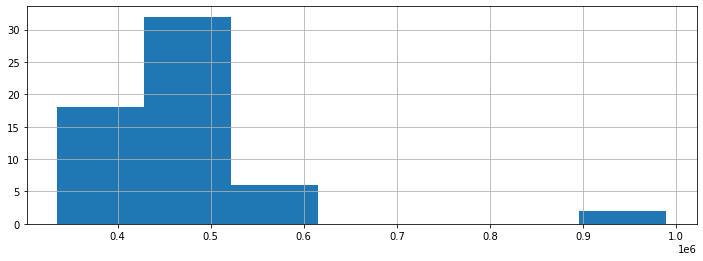

In [ ]:
#Se ve mejor en RStudio
plt.figure(figsize=(12,4))
data.Value[(data.CountryorArea == 'Colombia') & (data.UseLand == "Cropland")].hist(bins=7)

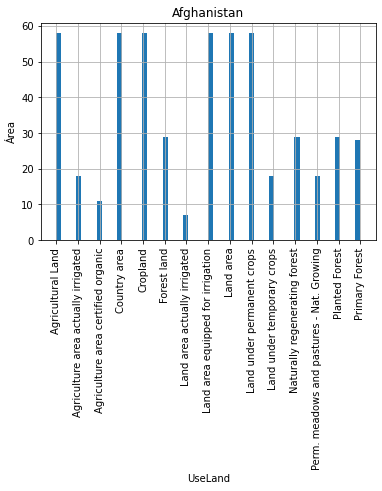

In [ ]:
#Si es correcto?
#listLastYears = ["2010", "2011", "2012","2013","2014","2015","2016","2017","2018","2019"]
for i in data.CountryorArea.unique():
  for j in data.UseLand.unique():
    title = i
    i = data[(data.CountryorArea==i)]
    plt.title(title)
    plt.xlabel('UseLand')
    plt.ylabel('Área')
    plt.hist(i['UseLand'], bins = 60)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()
    plt.clf()

### **1.4.2. Diagrama de barras**

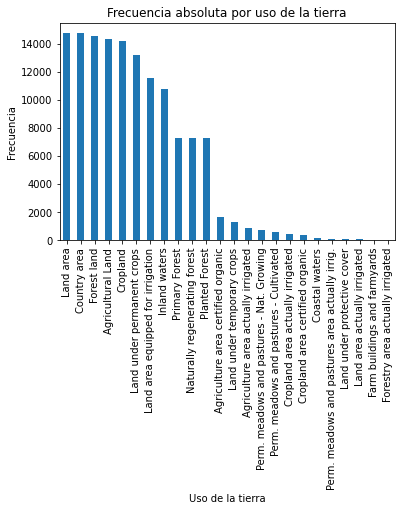

In [ ]:
data.groupby(["UseLand"]).size().nlargest(len(data.UseLand)).plot(kind='bar', title='Frecuencia absoluta por uso de la tierra',ylabel='Frecuencia', xlabel='Uso de la tierra')

### **1.4.3. Diagrama de caja**

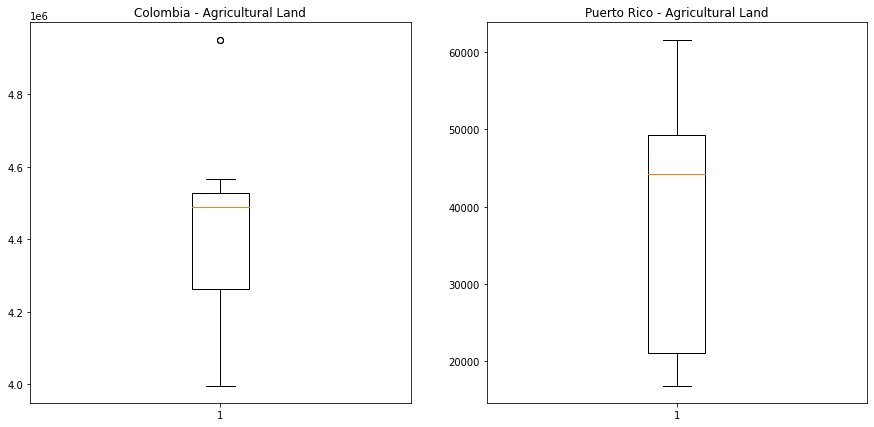

In [ ]:
plt.figure(figsize = (15,7))

plt.subplot(121) #Primer digito (filas), segundo (col), tercero (posición)
plt.title('Colombia - Agricultural Land')
plt . boxplot (data.Value[(data.CountryorArea=='Colombia')&(data.UseLand=='Agricultural Land')])

plt.subplot(122)
plt.title('Puerto Rico - Agricultural Land')
plt . boxplot (data.Value[(data.CountryorArea=='Puerto Rico')&(data.UseLand=='Agricultural Land')])
plt.show()

### **1.4.4. Serie de Tiempo**

**Nota:** se muestran 3 formas para presentar las 2 gráficas

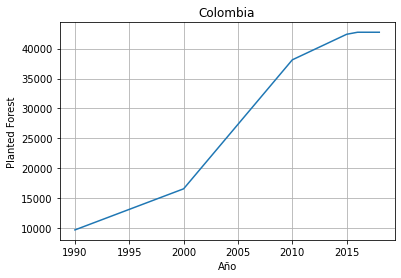

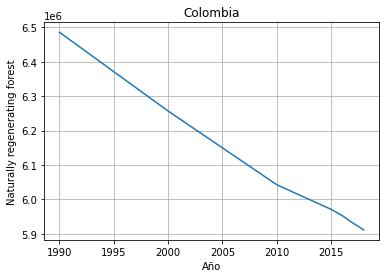

In [ ]:
#Generción gráficas por separado
x = data.Year[(data.CountryorArea == 'Colombia')  & (data.UseLand == 'Planted Forest')].values
y = data.Value[(data.CountryorArea == 'Colombia')  & (data.UseLand == 'Planted Forest')]
plt.figure(figsize = (6,4)) #Tamaño en x,y de la figura
plt . grid ( True )
plt.title('Colombia')
plt . ylabel('Planted Forest')
plt . xlabel('Año')
plt . plot ( x, y )
plt.show()

z = data.Year[(data.CountryorArea == 'Colombia')  & (data.UseLand == 'Naturally regenerating forest')].values
w = data.Value[(data.CountryorArea == 'Colombia')  & (data.UseLand == 'Naturally regenerating forest')]
plt.figure(figsize = (6,4))
plt . grid ( True )
plt.title('Colombia')
plt . ylabel('Naturally regenerating forest')
plt . xlabel('Año')
plt . plot ( z, w )
plt.show()

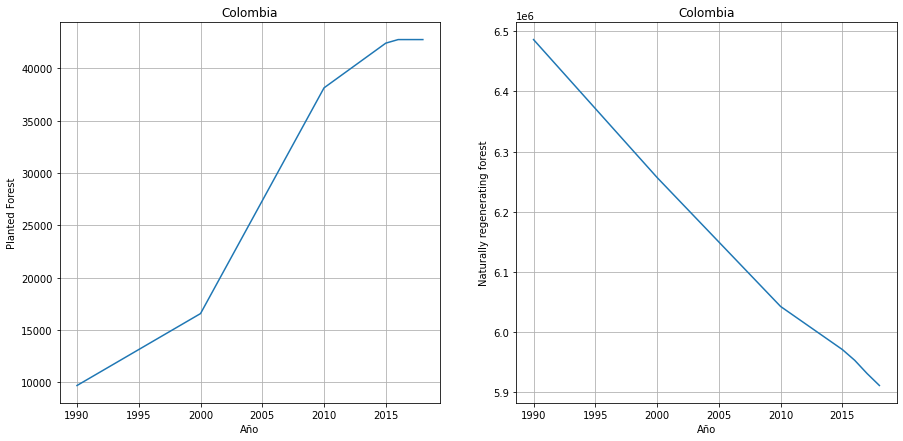

In [ ]:
# Varias gráficas como 1 solo plot.
#https://matplotlib.org/stable/tutorials/introductory/pyplot.html#:~:text=matplotlib.,the%20plot%20with%20labels%2C%20etc.
x = data.Year[(data.CountryorArea == 'Colombia')  & (data.UseLand == 'Planted Forest')].values
y = data.Value[(data.CountryorArea == 'Colombia')  & (data.UseLand == 'Planted Forest')]
z = data.Value[(data.CountryorArea == 'Colombia')  & (data.UseLand == 'Naturally regenerating forest')]

plt.figure(figsize = (15,7))

plt.subplot(121) #Primer digito (filas), segundo (col), tercero (posición)
plt . grid ( True )
plt.title('Colombia')
plt . ylabel('Planted Forest')
plt . xlabel('Año')
plt . plot ( x, y )

plt.subplot(122)
plt . grid ( True )
plt.title('Colombia')
plt . ylabel('Naturally regenerating forest')
plt . xlabel('Año')
plt . plot (x , z)
plt.show()

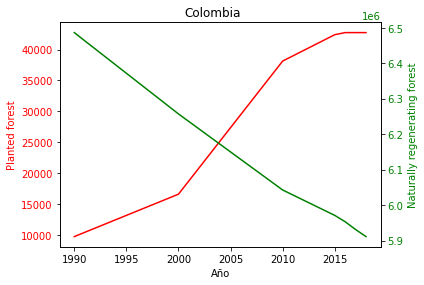

In [ ]:
#Gráfica combinada. Dos variables con ejes 'y' independientes. Misma línea de tiempo
#https://www.delftstack.com/es/howto/matplotlib/how-to-add-y-axis-label-to-secondary-y-axis-in-matplotlib/
x = data.Year[(data.CountryorArea == 'Colombia')  & (data.UseLand == 'Planted Forest')].values
y = data.Value[(data.CountryorArea == 'Colombia')  & (data.UseLand == 'Planted Forest')]
z = data.Value[(data.CountryorArea == 'Colombia')  & (data.UseLand == 'Naturally regenerating forest')]

fig, ax1 = plt.subplots()
plt.suptitle('Colombia')

color = 'red'
ax1.set_xlabel('Año')
ax1.set_ylabel('Planted forest', color=color)
ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Naturally regenerating forest', color=color)  
ax2.plot(x, z, color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()
plt.show()

# **2. Preprocesamiento de datos**

## **2.1. Limpieza**

### **2.1.1. Datos perdidos**

In [ ]:
# Se identifican el número de objetos y variables del set de datos.

data.columns = ['Country or Area', 'Element', 'Year', 'Unit', 'Value',
                'Value Footnotes', 'UseLand', 'Continent']
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

Number of instances = 136502
Number of attributes = 8


In [ ]:
# Se calcula la cantidad de datos perdidos por cada variable.

import numpy as np

data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 136502
Number of attributes = 8
Number of missing values:
	Country or Area: 0
	Element: 0
	Year: 0
	Unit: 0
	Value: 0
	Value Footnotes: 0
	UseLand: 0
	Continent: 0


### **2.1.2. Detección de outliers**

In [ ]:
# Cálculo con el rango intercuartílico {Q1-1.5*RI, Q3+1.5*RI} -> RI = Q3-Q1
umbral_sup= data.groupby([data.CountryorArea, data.UseLand])[['Value']].quantile(.75)+(1.5*(data.groupby([data.CountryorArea, data.UseLand])[['Value']].quantile(.75)-
      data.groupby([data.CountryorArea, data.UseLand])[['Value']].quantile(.25)))
print('Los umbrales superiores por uso de la tierra y país son: ')
print()
umbral_sup

Los umbrales superiores por uso de la tierra y país son: 



Value
CountryorArea UseLand                                       
Afghanistan   Agricultural Land                    3824937.5
              Agriculture area actually irrigated   252975.0
              Agriculture area certified organic        36.0
              Country area                         6528600.0
              Cropland                              824937.5
...                                                      ...
Zimbabwe      Land area equipped for irrigation      32625.0
              Land under permanent crops             10000.0
              Naturally regenerating forest        1924543.0
              Planted Forest                         16350.0
              Primary Forest                         80100.0

[3636 rows x 1 columns]

In [ ]:
umbral_inf= data.groupby([data.CountryorArea, data.UseLand])[['Value']].quantile(.25)-(1.5*(data.groupby([data.CountryorArea, data.UseLand])[['Value']].quantile(.75)-
      data.groupby([data.CountryorArea, data.UseLand])[['Value']].quantile(.25)))
print('Los umbrales inferiores por uso de la tierra y país son: ')
print()
umbral_inf

Los umbrales inferiores por uso de la tierra y país son: 



Value
CountryorArea UseLand                                       
Afghanistan   Agricultural Land                    3770637.5
              Agriculture area actually irrigated   176375.0
              Agriculture area certified organic       -16.0
              Country area                         6528600.0
              Cropland                              770637.5
...                                                      ...
Zimbabwe      Land area equipped for irrigation      -7975.0
              Land under permanent crops             10000.0
              Naturally regenerating forest        1683625.0
              Planted Forest                          7470.0
              Primary Forest                         80100.0

[3636 rows x 1 columns]

In [ ]:
data_mean = data.groupby(['CountryorArea','UseLand'])[['Value']].mean()
print('La media por cada tipo de uso de la tierra es: ')
print()
print(data_mean)

La media por cada tipo de uso de la tierra es: 

                                                          Value
CountryorArea UseLand                                          
Afghanistan   Agricultural Land                    3.793800e+06
              Agriculture area actually irrigated  2.146889e+05
              Agriculture area certified organic   1.581818e+01
              Country area                         6.528600e+06
              Cropland                             7.938000e+05
...                                                         ...
Zimbabwe      Land area equipped for irrigation    1.118448e+04
              Land under permanent crops           1.000000e+04
              Naturally regenerating forest        1.803899e+06
              Planted Forest                       1.208621e+04
              Primary Forest                       8.010000e+04

[3636 rows x 1 columns]


In [ ]:
def outlier (a,b):
  umbralsup = umbral_sup.iloc[(data_mean.index.get_level_values('CountryorArea') == a) &
                              (data_mean.index.get_level_values('UseLand') == b)]
  umbralinf = umbral_inf.iloc[(data_mean.index.get_level_values('CountryorArea') == a) & 
                              (data_mean.index.get_level_values('UseLand') == b)]
  dat = data.Value[(data.CountryorArea==a) & (data.UseLand==b)]
  print('Los outliers son: ')

  outliers = []
  for i in dat:
    if i > umbralsup.Value.item() or i < umbralinf.Value.item():
      outliers =+ i
      print(outliers)
  return outliers

#print('\033[;35m')
#print(f"{bcolors.OK}File Saved Successfully!{bcolors.RESET}")
print(data.CountryorArea.unique())
print('-------------------------------------------------------------------------') 
print(f'{bcolors.OK}***Los países que puede seleccionar se encuentran en la lista que se muestra arriba. Copiar sin comillas.{bcolors.RESET}')
print()
print(f'{bcolors.FAIL}***Los usos de la tierra que puede seleccionar son los siguientes. Copiar sin comillas.{bcolors.RESET}')
print()
print(data.UseLand.unique())
print()
pais = str(input('Ingrese el país que quiere evaluar: '))
uso_tierra = str(input('Ingrese el uso de la tierra que quiere evaluar: '))
resultado = outlier(pais,uso_tierra)

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Americas'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Australia and New Zealand' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Caribbean' 'Cayman Islands' 'Central African Republic' 'Central America'
 'Central Asia' 'Chad' 'Channel Islands' 'Chile' 'China'
 'China Hong Kong SAR' 'China mainland' 'Other non-specified areas'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "CÃ´te d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Czechoslovakia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Repu

## **2.2. Transformación de datos**

### **2.2.1. Normalización**

In [ ]:
### NO HAY NECESIDAD DE CORRER ESTE CÓDIGO. POSTERIORMENTE SE PUEDE LEER DESDE DRVE EL NUEVO DATAFRAME.
### CORRERLO TARDA AL REDEDOR DE 8 MIN
AgriculturalLand_norm = dataframe[dataframe.UseLand == "Agricultural Land"]
AgriculturalLand_norm_list = []
for i in AgriculturalLand_norm["Value"]:
  norm = ((i - min(AgriculturalLand_norm["Value"]))/(max(AgriculturalLand_norm["Value"]) - min(AgriculturalLand_norm["Value"])))
  AgriculturalLand_norm_list.append(norm)
AgriculturalLand_norm_list = pd.DataFrame(AgriculturalLand_norm_list)

AgricultureAreaActuallyIrrigated_norm = dataframe[dataframe.UseLand == "Agriculture area actually irrigated"]
AgricultureAreaActuallyIrrigated_norm_list = []
for i in AgricultureAreaActuallyIrrigated_norm["Value"]:
  norm = ((i - min(AgricultureAreaActuallyIrrigated_norm["Value"]))/(max(AgricultureAreaActuallyIrrigated_norm["Value"]) - min(AgricultureAreaActuallyIrrigated_norm["Value"])))
  AgricultureAreaActuallyIrrigated_norm_list.append(norm)
AgricultureAreaActuallyIrrigated_norm_list = pd.DataFrame(AgricultureAreaActuallyIrrigated_norm_list)

AgricultureAreaCertifiedOrganic_norm = dataframe[dataframe.UseLand == "Agriculture area certified organic"]
AgricultureAreaCertifiedOrganic_norm_list = []
for i in AgricultureAreaCertifiedOrganic_norm["Value"]:
  norm = ((i - min(AgricultureAreaCertifiedOrganic_norm["Value"]))/(max(AgricultureAreaCertifiedOrganic_norm["Value"]) - min(AgricultureAreaCertifiedOrganic_norm["Value"])))
  AgricultureAreaCertifiedOrganic_norm_list.append(norm)
AgricultureAreaCertifiedOrganic_norm_list = pd.DataFrame(AgricultureAreaCertifiedOrganic_norm_list)

CoastalWaters_norm = dataframe[dataframe.UseLand == "Coastal waters"]
CoastalWaters_norm_list = []
for i in CoastalWaters_norm["Value"]:
  norm = ((i - min(CoastalWaters_norm["Value"]))/(max(CoastalWaters_norm["Value"]) - min(CoastalWaters_norm["Value"])))
  CoastalWaters_norm_list.append(norm)
CoastalWaters_norm_list = pd.DataFrame(CoastalWaters_norm_list)

CountryArea_norm = dataframe[dataframe.UseLand == "Country area"]
CountryArea_norm_list = []
for i in CountryArea_norm["Value"]:
  norm = ((i - min(CountryArea_norm["Value"]))/(max(CountryArea_norm["Value"]) - min(CountryArea_norm["Value"])))
  CountryArea_norm_list.append(norm)
CountryArea_norm_list = pd.DataFrame(CountryArea_norm_list)

Cropland_norm = dataframe[dataframe.UseLand == "Cropland"]
Cropland_norm_list = []
for i in Cropland_norm["Value"]:
  norm = ((i - min(Cropland_norm["Value"]))/(max(Cropland_norm["Value"]) - min(Cropland_norm["Value"])))
  Cropland_norm_list.append(norm)
Cropland_norm_list = pd.DataFrame(Cropland_norm_list)

CroplandAreaActuallyIrrigated_norm = dataframe[dataframe.UseLand == "Cropland area actually irrigated"]
CroplandAreaActuallyIrrigated_norm_list = []
for i in CroplandAreaActuallyIrrigated_norm["Value"]:
  norm = ((i - min(CroplandAreaActuallyIrrigated_norm["Value"]))/(max(CroplandAreaActuallyIrrigated_norm["Value"]) - min(CroplandAreaActuallyIrrigated_norm["Value"])))
  CroplandAreaActuallyIrrigated_norm_list.append(norm)
CroplandAreaActuallyIrrigated_norm_list = pd.DataFrame(CroplandAreaActuallyIrrigated_norm_list)

CroplandAreaCertifiedOrganic_norm = dataframe[dataframe.UseLand == "Cropland area certified organic"]
CroplandAreaCertifiedOrganic_norm_list = []
for i in CroplandAreaCertifiedOrganic_norm["Value"]:
  norm = ((i - min(CroplandAreaCertifiedOrganic_norm["Value"]))/(max(CroplandAreaCertifiedOrganic_norm["Value"]) - min(CroplandAreaCertifiedOrganic_norm["Value"])))
  CroplandAreaCertifiedOrganic_norm_list.append(norm)
CroplandAreaCertifiedOrganic_norm_list = pd.DataFrame(CroplandAreaCertifiedOrganic_norm_list)

FarmBuildingsAndFarmyards_norm = dataframe[dataframe.UseLand == "Farm buildings and farmyards"]
FarmBuildingsAndFarmyards_norm_list = []
for i in FarmBuildingsAndFarmyards_norm["Value"]:
  norm = ((i - min(FarmBuildingsAndFarmyards_norm["Value"]))/(max(FarmBuildingsAndFarmyards_norm["Value"]) - min(FarmBuildingsAndFarmyards_norm["Value"])))
  FarmBuildingsAndFarmyards_norm_list.append(norm)
FarmBuildingsAndFarmyards_norm_list = pd.DataFrame(FarmBuildingsAndFarmyards_norm_list)

ForestLand_norm = dataframe[dataframe.UseLand == "Forest land"]
ForestLand_norm_list = []
for i in ForestLand_norm["Value"]:
  norm = ((i - min(ForestLand_norm["Value"]))/(max(ForestLand_norm["Value"]) - min(ForestLand_norm["Value"])))
  ForestLand_norm_list.append(norm)
ForestLand_norm_list = pd.DataFrame(ForestLand_norm_list)

ForestryAreaActuallyIrrigated_norm = dataframe[dataframe.UseLand == "Forestry area actually irrigated"]
ForestryAreaActuallyIrrigated_norm_list = []
for i in ForestryAreaActuallyIrrigated_norm["Value"]:
  norm = ((i - min(ForestryAreaActuallyIrrigated_norm["Value"]))/(max(ForestryAreaActuallyIrrigated_norm["Value"]) - min(ForestryAreaActuallyIrrigated_norm["Value"])))
  ForestryAreaActuallyIrrigated_norm_list.append(norm)
ForestryAreaActuallyIrrigated_norm_list = pd.DataFrame(ForestryAreaActuallyIrrigated_norm_list)

InlandWaters_norm = dataframe[dataframe.UseLand == "Inland waters"]
InlandWaters_norm_list = []
for i in InlandWaters_norm["Value"]:
  norm = ((i - min(InlandWaters_norm["Value"]))/(max(InlandWaters_norm["Value"]) - min(InlandWaters_norm["Value"])))
  InlandWaters_norm_list.append(norm)
InlandWaters_norm_list = pd.DataFrame(InlandWaters_norm_list)

LandArea_norm = dataframe[dataframe.UseLand == "Land area"]
LandArea_norm_list = []
for i in LandArea_norm["Value"]:
  norm = ((i - min(LandArea_norm["Value"]))/(max(LandArea_norm["Value"]) - min(LandArea_norm["Value"])))
  LandArea_norm_list.append(norm)
LandArea_norm_list = pd.DataFrame(LandArea_norm_list)

LandAreaActuallyIrrigated_norm = dataframe[dataframe.UseLand == "Land area actually irrigated"]
LandAreaActuallyIrrigated_norm_list = []
for i in LandAreaActuallyIrrigated_norm["Value"]:
  norm = ((i - min(LandAreaActuallyIrrigated_norm["Value"]))/(max(LandAreaActuallyIrrigated_norm["Value"]) - min(LandAreaActuallyIrrigated_norm["Value"])))
  LandAreaActuallyIrrigated_norm_list.append(norm)
LandAreaActuallyIrrigated_norm_list = pd.DataFrame(LandAreaActuallyIrrigated_norm_list)

LandAreaEquippedForIrrigation_norm = dataframe[dataframe.UseLand == "Land area equipped for irrigation"]
LandAreaEquippedForIrrigation_norm_list = []
for i in LandAreaEquippedForIrrigation_norm["Value"]:
  norm = ((i - min(LandAreaEquippedForIrrigation_norm["Value"]))/(max(LandAreaEquippedForIrrigation_norm["Value"]) - min(LandAreaEquippedForIrrigation_norm["Value"])))
  LandAreaEquippedForIrrigation_norm_list.append(norm)
LandAreaEquippedForIrrigation_norm_list = pd.DataFrame(LandAreaEquippedForIrrigation_norm_list)

LandUnderPermanentCrops_norm = dataframe[dataframe.UseLand == "Land under permanent crops"]
LandUnderPermanentCrops_norm_list = []
for i in LandUnderPermanentCrops_norm["Value"]:
  norm = ((i - min(LandUnderPermanentCrops_norm["Value"]))/(max(LandUnderPermanentCrops_norm["Value"]) - min(LandUnderPermanentCrops_norm["Value"])))
  LandUnderPermanentCrops_norm_list.append(norm)
LandUnderPermanentCrops_norm_list = pd.DataFrame(LandUnderPermanentCrops_norm_list)

LandUnderProtectiveCover_norm = dataframe[dataframe.UseLand == "Land under protective cover"]
LandUnderProtectiveCover_norm_list = []
for i in LandUnderProtectiveCover_norm["Value"]:
  norm = ((i - min(LandUnderProtectiveCover_norm["Value"]))/(max(LandUnderProtectiveCover_norm["Value"]) - min(LandUnderProtectiveCover_norm["Value"])))
  LandUnderProtectiveCover_norm_list.append(norm)
LandUnderProtectiveCover_norm_list = pd.DataFrame(LandUnderProtectiveCover_norm_list)

LandUnderTemporaryCrops_norm = dataframe[dataframe.UseLand == "Land under temporary crops"]
LandUnderTemporaryCrops_norm_list = []
for i in LandUnderTemporaryCrops_norm["Value"]:
  norm = ((i - min(LandUnderTemporaryCrops_norm["Value"]))/(max(LandUnderTemporaryCrops_norm["Value"]) - min(LandUnderTemporaryCrops_norm["Value"])))
  LandUnderTemporaryCrops_norm_list.append(norm)
LandUnderTemporaryCrops_norm_list = pd.DataFrame(LandUnderTemporaryCrops_norm_list)

NaturallyRegeneratingForest_norm = dataframe[dataframe.UseLand == "Naturally regenerating forest"]
NaturallyRegeneratingForest_norm_list = []
for i in NaturallyRegeneratingForest_norm["Value"]:
  norm = ((i - min(NaturallyRegeneratingForest_norm["Value"]))/(max(NaturallyRegeneratingForest_norm["Value"]) - min(NaturallyRegeneratingForest_norm["Value"])))
  NaturallyRegeneratingForest_norm_list.append(norm)
NaturallyRegeneratingForest_norm_list = pd.DataFrame(NaturallyRegeneratingForest_norm_list)

PermMeadowsAndPasturesCultivated_norm = dataframe[dataframe.UseLand == "Perm. meadows and pastures - Cultivated"]
PermMeadowsAndPasturesCultivated_norm_list = []
for i in PermMeadowsAndPasturesCultivated_norm["Value"]:
  norm = ((i - min(PermMeadowsAndPasturesCultivated_norm["Value"]))/(max(PermMeadowsAndPasturesCultivated_norm["Value"]) - min(PermMeadowsAndPasturesCultivated_norm["Value"])))
  PermMeadowsAndPasturesCultivated_norm_list.append(norm)
PermMeadowsAndPasturesCultivated_norm_list = pd.DataFrame(PermMeadowsAndPasturesCultivated_norm_list)

PermMeadowsAndPasturesNatGrowing_norm = dataframe[dataframe.UseLand == "Perm. meadows and pastures - Nat. Growing"]
PermMeadowsAndPasturesNatGrowing_norm_list = []
for i in PermMeadowsAndPasturesNatGrowing_norm["Value"]:
  norm = ((i - min(PermMeadowsAndPasturesNatGrowing_norm["Value"]))/(max(PermMeadowsAndPasturesNatGrowing_norm["Value"]) - min(PermMeadowsAndPasturesNatGrowing_norm["Value"])))
  PermMeadowsAndPasturesNatGrowing_norm_list.append(norm)
PermMeadowsAndPasturesNatGrowing_norm_list = pd.DataFrame(PermMeadowsAndPasturesNatGrowing_norm_list)

PermMeadowsAndPasturesAreaActuallyIrrig_norm = dataframe[dataframe.UseLand == "Perm. meadows and pastures area actually irrig."]
PermMeadowsAndPasturesAreaActuallyIrrig_norm_list = []
for i in PermMeadowsAndPasturesAreaActuallyIrrig_norm["Value"]:
  norm = ((i - min(PermMeadowsAndPasturesAreaActuallyIrrig_norm["Value"]))/(max(PermMeadowsAndPasturesAreaActuallyIrrig_norm["Value"]) - min(PermMeadowsAndPasturesAreaActuallyIrrig_norm["Value"])))
  PermMeadowsAndPasturesAreaActuallyIrrig_norm_list.append(norm)
PermMeadowsAndPasturesAreaActuallyIrrig_norm_list = pd.DataFrame(PermMeadowsAndPasturesAreaActuallyIrrig_norm_list)

PlantedForest_norm = dataframe[dataframe.UseLand == "Planted Forest"]
PlantedForest_norm_list = []
for i in PlantedForest_norm["Value"]:
  norm = ((i - min(PlantedForest_norm["Value"]))/(max(PlantedForest_norm["Value"]) - min(PlantedForest_norm["Value"])))
  PlantedForest_norm_list.append(norm)
PlantedForest_norm_list = pd.DataFrame(PlantedForest_norm_list)

PrimaryForest_norm = dataframe[dataframe.UseLand == "Primary Forest"]
PrimaryForest_norm_list = []
for i in PrimaryForest_norm["Value"]:
  norm = ((i - min(PrimaryForest_norm["Value"]))/(max(PrimaryForest_norm["Value"]) - min(PrimaryForest_norm["Value"])))
  PrimaryForest_norm_list.append(norm)
PrimaryForest_norm_list = pd.DataFrame(PrimaryForest_norm_list)

In [ ]:
value_norm = pd.concat([AgriculturalLand_norm_list, AgricultureAreaActuallyIrrigated_norm_list, AgricultureAreaCertifiedOrganic_norm_list,
                        CoastalWaters_norm_list,CountryArea_norm_list,Cropland_norm_list,CroplandAreaActuallyIrrigated_norm_list,
                        CroplandAreaCertifiedOrganic_norm_list,FarmBuildingsAndFarmyards_norm_list,ForestLand_norm_list,
                        ForestryAreaActuallyIrrigated_norm_list,InlandWaters_norm_list,LandArea_norm_list,LandAreaActuallyIrrigated_norm_list,
                        LandAreaEquippedForIrrigation_norm_list,LandUnderPermanentCrops_norm_list,LandUnderProtectiveCover_norm_list,
                        LandUnderTemporaryCrops_norm_list,NaturallyRegeneratingForest_norm_list,PermMeadowsAndPasturesCultivated_norm_list,
                        PermMeadowsAndPasturesNatGrowing_norm_list,PermMeadowsAndPasturesAreaActuallyIrrig_norm_list,
                        PlantedForest_norm_list,PrimaryForest_norm_list], axis=0)
value_norm = pd.DataFrame(value_norm)

In [ ]:
# Tampoco correrlo. Acá se creo el nuevo 'csv' que ya está en Drive. En el cod de abajo se lee
dataframe_norm = dataframe.assign(Value_norm=value_norm.values)
dataframe_norm = dataframe_norm.drop(['Value'], axis=1)
dataframe_norm = dataframe_norm.reindex(columns=["CountryorArea","Element","Year","Unit","Value_norm","ValueFootnotes","UseLand","Continent"])
dataframe_norm.to_csv(r'UseLand_Total_norm.csv', index = False)

In [ ]:
dataframe_norm = pd.read_csv('/content/drive/MyDrive/UseLand_Total_norm.csv' , sep = ";")
dataframe_norm.head()

,CountryorArea,Element,Year,Unit,Value_norm,ValueFootnotes,UseLand,Continent
0,Afghanistan,Area,2018,1000 ha,"0,007766756",Q,Agricultural Land,Asia
1,Afghanistan,Area,2017,1000 ha,"0,007764912",Q,Agricultural Land,Asia
2,Afghanistan,Area,2016,1000 ha,"0,007764912",Q,Agricultural Land,Asia
3,Afghanistan,Area,2015,1000 ha,"0,007764912",Q,Agricultural Land,Asia
4,Afghanistan,Area,2014,1000 ha,"0,007764912",Q,Agricultural Land,Asia


In [ ]:
for i in dataframe_norm.Continent.unique():
  plt.figure(figsize = (250, 200)) 
  dataframe_norm.boxplot(by='Continent')

In [ ]:
dataframe_norm.groupby(["Continent"], sort=False).size().nlargest(len(dataframe_norm.Continent))

In [ ]:
#Grafica por continente y uso de tierra.
for i in data["Continent"].unique():
    title = i
    #i = df_filtered[(df_filtered['Continent']==i) &  (df_filtered['Year']==2018)]
    i = data[(data['Continent']==i) &  (data['Year'].isin(data.Year))]
    plt.title(title)
    plt.xlabel('UseLand')
    plt.ylabel('Aréa')
    plt.hist(i['UseLand'], bins = 60)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()
    #plt.clf()

# **3. Asociación**

# **4. Agrupación / Clustering**

Agrupar países por su similitud respecto a los usos de la tierra por cada año.

Se toman unicamente los valores del uso de la tierra para **Colombia** a lo largo del tiempo, es decir, en el periodo $1961-2018$. Se elimina el uso de la tierra 'Primary Forest' ya que tiene valores de $0$ para todos los años. En total se tienen $16$ usos de la tierra para Colombia.

In [27]:
import pandas as pd
data_clust = pd.read_csv('/content/drive/MyDrive/UseLand_Clustering.csv' , sep = ";")
#data_clust = data_clust.drop(data_clust[data_clust['Value'] == 0].index)
#data_clust.plot.scatter(x='Year',y='Value')
#plt.title('Land Uses')

Text(0.5, 1.0, 'Land Uses')

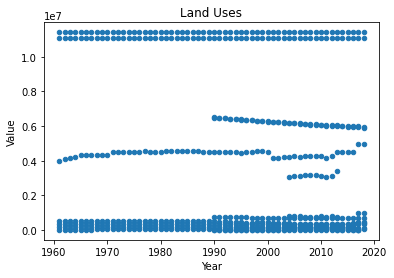

In [28]:
data_clust.plot.scatter(x='Year',y='Value')
plt.title('Land Uses')

In [30]:
init_clus=np.random.choice(np.arange(data_clust.shape[0]),replace=False, size=16)
print(init_clus)

[ 87 558 260 145  40  95 487 120 456 412 436 404 173 116 458 504]


## 4.1. KMeans

In [29]:
from sklearn.cluster import KMeans
import numpy as np
# Definición de una funcion del simplekmeans para ver por iteraciones
from sklearn.metrics.pairwise import euclidean_distances
def simple_kmeans(data_clust,k, iter=100):
    # Inicializacion de los primeros centroides
    init_clus=np.random.choice(np.arange(data_clust.shape[0]),replace=False, size=k)
    #print(init_clus)
    clusters=data_clust[init_clus]
    preds=np.argmin(euclidean_distances(data_clust,clusters),axis=1)
    all_clusters=[clusters.copy()]
    all_preds=[preds]
    for i in range(iter):
        for clus in range(k):
            clusters[clus]=data_clust[preds==clus].mean(axis=0)
            all_clusters.append(clusters.copy())
            preds=np.argmin(euclidean_distances(data_clust,clusters),axis=1)
            all_preds.append(preds.copy())
    return all_clusters,all_preds

points = np.array(data_clust)
all_clusters,all_preds=simple_kmeans(points,17)


#print(Centroid_init)

#kmeans = KMeans(n_clusters=3,init=Centroid_init, random_state=i,n_init=1).fit(points)
#print(kmeans.cluster_centers_)
#all_clusters,all_preds=simple_kmeans(points,17)

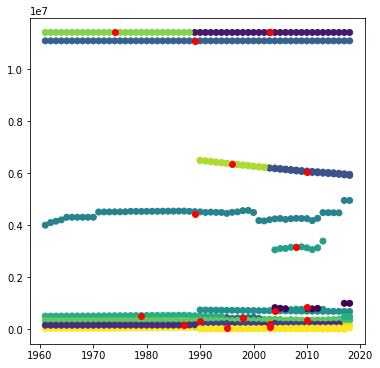

In [25]:
# Iteración 0. Se realiza la inicialización aleatoriamente, para el ejemplo son 5 puntos, 
# y los demas puntos se asignan al cluster más cercano.

iteration=80 #@param {type:"slider", min:0, max:80, step:1}
plt.figure(figsize=(6,6))
plt.scatter(points[:,0],points[:,1],c=all_preds[iteration])
plt.scatter(all_clusters[iteration][:,0],all_clusters[iteration][:,1],c="r")

## 4.1. DBScan

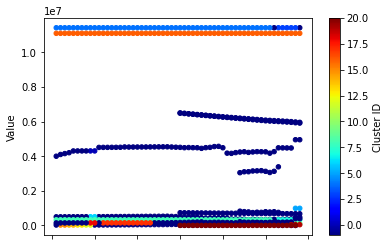

In [26]:
#Aplicacion del algoritmo DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np

data_clust1 = pd.DataFrame(copy(data_clust), columns=['Year', 'Value'])
db = DBSCAN(eps=1.5, min_samples=2,).fit(data_clust1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data_clust1,labels), axis=1)
result.plot.scatter(x='Year',y='Value',c='Cluster ID', colormap='jet')

## 4.1. Gaussian Mixture Model (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture

data_clust2 = pd.DataFrame(copy(data_clust), columns=['Year', 'Value'])
data_clust_np = np.array(data_clust2)
model=GaussianMixture(n_components=16, covariance_type='full', random_state=42)
model.fit(data_clust_np)
GaussianMixture

sklearn.mixture._gaussian_mixture.GaussianMixture

Text(0.5, 1.0, 'GMM')

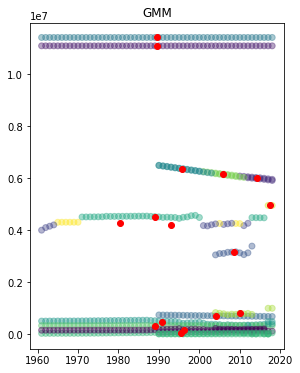

In [ ]:
# Se dibujan los clusters obtenidos 
plt.figure(figsize=(10,6))
pred2=model.predict(data_clust_np)
plt.subplot(122)
plt.scatter(data_clust_np[:,0],data_clust_np[:,1],c=pred2,alpha=0.4)
plt.scatter(model.means_[:,0],model.means_[:,1],c="r")
plt.title("GMM")

# **5. Validación Agrupación / Clustering**

En seguida se muestran los clusters a partir de sus etiquetas reales:

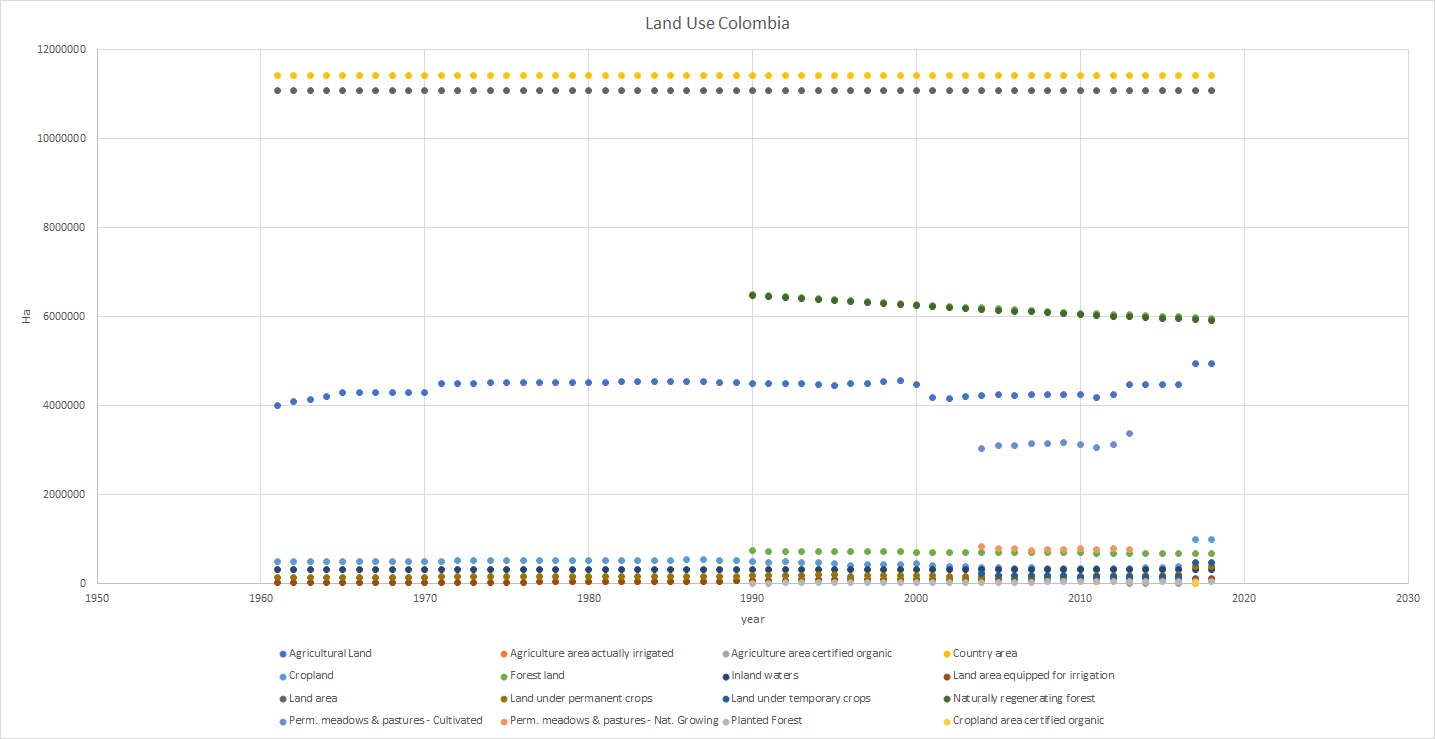

## 5.1. KMeans / Davies-Bouldin (DB)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=16, random_state=1).fit(data_clust)
labels = kmeans.labels_
davies_bouldin_score(data_clust, labels)

0.2599237769533329

## 5.2. KMeans / Silhouette

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(data_clust, labels, metric='euclidean')

0.8147860303723681

## 5.3. DBScan / Davies-Bouldin (DB)

In [ ]:
davies_bouldin_score(data_clust1, labels)

0.27531554998305585

## 5.4. DBScan / Silhouette

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(data_clust1, labels, metric='euclidean')

0.8147860303723681

## 5.5. GMM / Davies-Bouldin (DB)

In [ ]:
metrics.silhouette_score(data_clust_np, labels, metric='euclidean')

0.8147860303723681

## 5.6. GMM / Silhouette

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(data_clust_np, labels, metric='euclidean')

0.8147860303723681

# |-----------------------------------------------|

# Agrupación / Clustering II

# KMeans

Este ejercicio es más adecuado que el que se encuentra en secciones anteriores

In [86]:
import pandas as pd
proporciones = pd.read_csv('/content/drive/MyDrive/Clustering.csv' , sep = ";")
proporciones.head()

,Country,LandUse_Value,Proportion
0,Afghanistan,3791900,0.580814
1,Afghanistan,3791000,0.580676
2,Afghanistan,3791000,0.580676
3,Afghanistan,3791000,0.580676
4,Afghanistan,3791000,0.580676


In [127]:
# Se importa los algoritmos de grupación de la libreria de sklearn
from sklearn import cluster

data_clust3 = proporciones.drop('Country',axis=1)
k_means = cluster.KMeans(n_clusters=5, max_iter=50, random_state=1)
k_means.fit(data_clust3)
labels = k_means.labels_
# La asignación de grupo a cada usuario es visualizada como un objeto dataframe
pd.DataFrame(labels, index=proporciones.Country, columns=['ID Grupo'])

,ID Grupo
Country,
Afghanistan,0
Afghanistan,0
Afghanistan,0
Afghanistan,0
Afghanistan,0
...,...
Zimbabwe,0
Zimbabwe,0
Zimbabwe,0


In [ ]:
#Visualización de centroides

centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data_clust3.columns)

# KMeans II

In [55]:
# Importar funciones y conjunto de datos

import pandas as pd
from sklearn import cluster
#from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [100]:
n_clusters = 5
# ejecuta el k-means con k=2
km = cluster.KMeans(n_clusters)
km.fit(data_clust3)
y = km.predict(data_clust3)
data_clust3.shape

(121764, 2)

In [101]:
km.cluster_centers_

array([[-3.51502269,  5.0346323 ],
       [ 1.06589731, -7.80292554],
       [-6.85259757,  2.91064213],
       [ 5.00935952,  1.30206852],
       [-4.03960029,  0.4353896 ]])

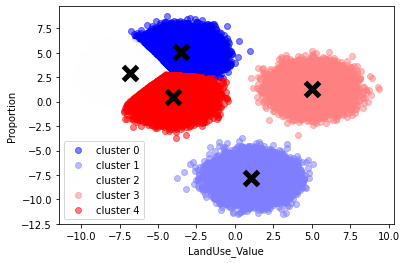

In [102]:
# Dibuja los grupos con sus centroides
cmap = plt.cm.plasma

cmap((y*255./(n_clusters-1)).astype(int))
for i in np.unique(y):
    cmap = plt.cm.bwr
    col = cmap((i*255./(n_clusters-1)).astype(int))
    Xr = data_clust3[y==i]
    plt.scatter(Xr[:,0], Xr[:,1], color=col, label="cluster %d"%i, alpha=.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
plt.legend()    
plt.xlabel("LandUse_Value")
plt.ylabel("Proportion");

# Iteración KMeans

Text(0, 0.5, 'SSE')

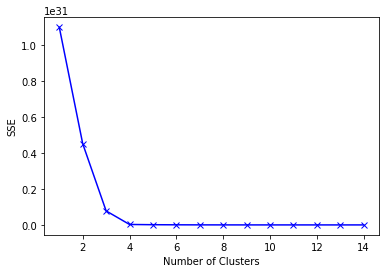

In [91]:
# Con este código no es necesario indicar el número de centroides. Con el anterior (make_blobs) si se requiere...
# Entre 4 y 5 clusters la suma de cuadrados muestra la mayor disminución
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data_clust3)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'Proportion')

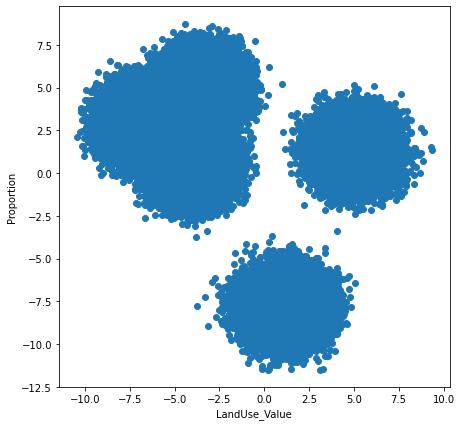

In [98]:
from sklearn.datasets import make_blobs
#np.random.seed(2)
# Creación de un dataset sintético de 5 grupos con 600 puntos (se incluyen valores negativos)
data_clust3,_=make_blobs(n_samples=len(data_clust3),centers=5)
plt.figure(figsize=(7,7))
plt.scatter(data_clust3[:,0],data_clust3[:,1])
plt.xlabel("LandUse_Value")
plt.ylabel("Proportion")


In [103]:
# Definición de una funcion del simplekmeans para ver por iteraciones
from sklearn.metrics.pairwise import euclidean_distances
def simple_kmeans(data_clust3,k, iter=100):
    # Inicializacion de los primeros centroides
    init_clus=np.random.choice(np.arange(data_clust3.shape[0]),replace=False, size=k)
    clusters=data_clust3[init_clus]
    preds=np.argmin(euclidean_distances(data_clust3,clusters),axis=1)
    all_clusters=[clusters.copy()]
    all_preds=[preds]
    for i in range(iter):
        for clus in range(k):
            clusters[clus]=data_clust3[preds==clus].mean(axis=0)
            all_clusters.append(clusters.copy())
            preds=np.argmin(euclidean_distances(data_clust3,clusters),axis=1)
            all_preds.append(preds.copy())
    return all_clusters,all_preds

all_clusters,all_preds=simple_kmeans(data_clust3,5)

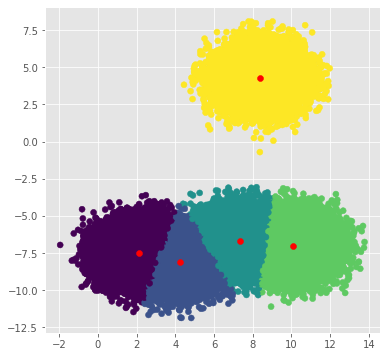

In [ ]:
# Iteración 0. Se realiza la inicialización aleatoriamente, para el ejemplo son 5 puntos, 
# y los demas puntos se asignan al cluster más cercano.

iteration=100 #@param {type:"slider", min:0, max:100, step:1}
plt.figure(figsize=(6,6))
plt.scatter(data_clust3[:,0],data_clust3[:,1],c=all_preds[iteration])
plt.scatter(all_clusters[iteration][:,0],all_clusters[iteration][:,1],c="r")


# DBSCAN

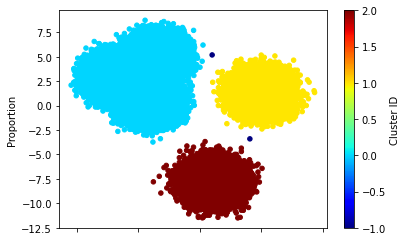

In [111]:
#Aplicacion del algoritmo DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np
data_clust4 = pd.DataFrame(copy(data_clust3), columns=['LandUse_Value', 'Proportion'])
db = DBSCAN(eps=1, min_samples=3,).fit(data_clust4)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((pd.DataFrame(data_clust4),labels), axis=1)
result.plot.scatter(x='LandUse_Value',y='Proportion',c='Cluster ID', colormap='jet')

#GMM

In [69]:
from sklearn.mixture import GaussianMixture

data_clust5 = pd.DataFrame(copy(data_clust3), columns=['LandUse_Value', 'Proportion'])
data_clust_np = np.array(data_clust5)
model=GaussianMixture(n_components=5, covariance_type='full', random_state=42)
model.fit(data_clust_np)
GaussianMixture

sklearn.mixture._gaussian_mixture.GaussianMixture

Text(0.5, 1.0, 'GMM')

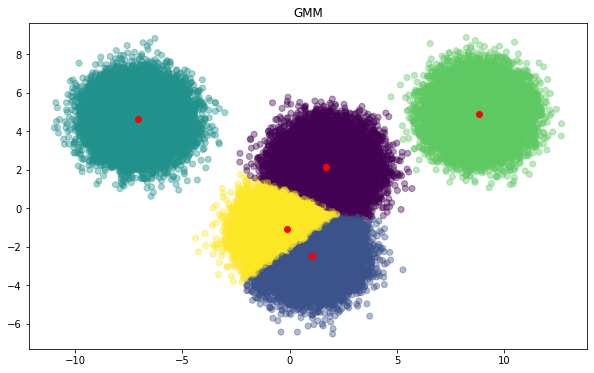

In [70]:
# Se dibujan los clusters obtenidos 
plt.figure(figsize=(10,6))
pred2=model.predict(data_clust_np)
#plt.subplot(122)
plt.scatter(data_clust_np[:,0],data_clust_np[:,1],c=pred2,alpha=0.4)
plt.scatter(model.means_[:,0],model.means_[:,1],c="r")
plt.title("GMM")

# Vlidación

## KMeans / Davies-Boulding (DB)

In [109]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=5, random_state=1).fit(data_clust3)
labels = kmeans.labels_
davies_bouldin_score(data_clust3, labels)

0.4899757562930418

## KMeans /  Silhouette

In [105]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(data_clust3, labels, metric='euclidean')

0.6415672514155137

## BDScan / Davies-Boulding (DB)

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=5, random_state=1).fit(data_clust4)
labels = kmeans.labels_
davies_bouldin_score(data_clust4, labels)

0.6627276669824942

## BDScan /  Silhouette

In [106]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(data_clust4, labels, metric='euclidean')

-0.005233780943371835

## GMM / Davies-Boulding (DB)

In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=5, random_state=1).fit(data_clust5)
labels = kmeans.labels_
davies_bouldin_score(data_clust5, labels)

0.6627276669824942

## GMM /  Silhouette

In [108]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(data_clust5, labels, metric='euclidean')

0.563782224744706